In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
def plot_memory_curve(path_file):
    dictionary = json.load(open(path_file, 'r'))
    for k, v in dictionary['rows'].items():
        times = []
        allocations = []
        reservations = []
        for obs in v:
            time = obs[0]
            times.append(time)
            allocated = obs[1]
            allocations.append(allocated)
            reserved = obs[2]
            reservations.append(reserved)

        plt.figure()
        plt.grid(True)
        plt.title(k)
        plt.xlabel('Time (ms)')
        plt.ylabel('Memory Usage (MB)')
        plt.plot(times, allocations, label="Allocated (MB)")
        plt.plot(times, reservations, label="Reserved (MB)")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
        plt.show()

In [3]:
def display_memory_table(path_file, top=False, order_by=1, n_top=10):
    stats = json.load(open(path_file, 'r'))
    stats.pop('metadata')
    column_names = []
    for i in stats['columns']:
        column_name = i['name']
        column_names.append(column_name)     
    for k, v in stats['rows'].items():
        rows = []
        for row in v:
            rows.append(row) 
        df = pd.DataFrame(data=rows, columns=column_names)
        if top:
            print("\n\n", k, n_top, "Top", df.columns[order_by])
            df = df.sort_values(by=df.columns[order_by], ascending=False).head(n_top)
            df.plot.bar(x=df.columns[0], y=df.columns[order_by], title="{} {} Top {}".format(k, n_top, df.columns[order_by]))
            display(df)
            continue
            return          
        print("\n", k)
        display(df)

## Resnet18

### Memory Curve

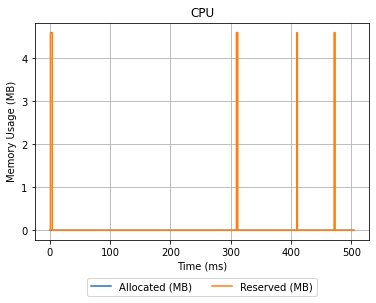

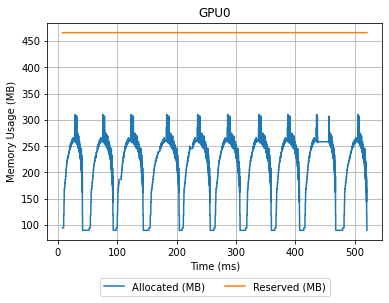

In [4]:
plot_memory_curve('resnet18_train_float_memory_curve.json')

### Memory Stats

In [5]:
display_memory_table('resnet18_train_float_memory_stats.json')


 CPU


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
0,MeanBackward1,10,0.00,0.00,10,0,0.08,0.00
1,aten::div,10,0.00,0.00,10,10,0.08,0.08
2,aten::empty,2638,0.39,0.39,40,40,0.39,0.39
3,aten::zeros,20,0.08,0.00,20,0,0.08,0.00
4,autograd::engine::evaluate_function: MeanBackw...,10,0.00,0.00,10,0,0.08,0.00



 GPU0


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
0,AddmmBackward0,10,20160.0,0.0,20,0,20160.0,0.0
1,CudnnBatchNormBackward0,200,776560.0,0.0,600,0,776560.0,0.0
2,CudnnConvolutionBackward0,200,1092050.0,0.0,710,0,5558275.0,0.0
3,LogSoftmaxBackward0,10,315.0,0.0,10,0,315.0,0.0
4,MaxPool2DWithIndicesBackward0,10,250880.0,0.0,10,0,250880.0,0.0
5,MeanBackward1,10,7840.0,0.0,10,0,7840.0,0.0
6,NllLossBackward0,10,315.0,0.0,10,0,315.0,0.0
7,ReluBackward0,170,721280.0,0.0,170,0,721280.0,0.0
8,aten::_batch_norm_impl_index,200,776560.0,0.0,600,0,776560.0,0.0
9,aten::_convolution,200,781920.0,0.0,370,0,1285750.0,0.0


#### Top 10 by Calls



 CPU 10 Top Calls


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
2,aten::empty,2638,0.39,0.39,40,40,0.39,0.39
3,aten::zeros,20,0.08,0.00,20,0,0.08,0.00
0,MeanBackward1,10,0.00,0.00,10,0,0.08,0.00
1,aten::div,10,0.00,0.00,10,10,0.08,0.08
4,autograd::engine::evaluate_function: MeanBackw...,10,0.00,0.00,10,0,0.08,0.00




 GPU0 10 Top Calls


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
27,aten::empty,2638,6980185.0,6980185.0,1890,1890,6980185.0,6980185.0
53,autograd::engine::evaluate_function: torch::au...,620,-477450.0,-477450.0,0,0,0.0,0.0
14,aten::add,280,290180.0,290180.0,280,280,290180.0,290180.0
28,aten::empty_like,210,776165.0,0.0,210,0,776165.0,0.0
16,aten::batch_norm,200,776560.0,0.0,600,0,776560.0,0.0
47,autograd::engine::evaluate_function: CudnnConv...,200,-86830.0,-1468960.0,790,0,5848355.0,0.0
46,autograd::engine::evaluate_function: CudnnBatc...,200,-546720.0,-1323280.0,600,0,776560.0,0.0
1,CudnnBatchNormBackward0,200,776560.0,0.0,600,0,776560.0,0.0
25,aten::cudnn_convolution_backward_weight,200,457010.0,-3442100.0,390,0,3899110.0,0.0
23,aten::cudnn_convolution_backward,200,1092050.0,0.0,710,0,5558275.0,0.0


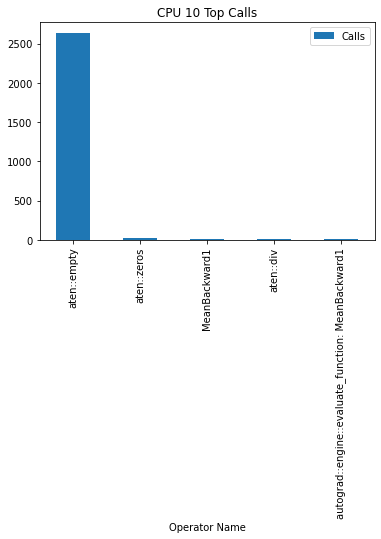

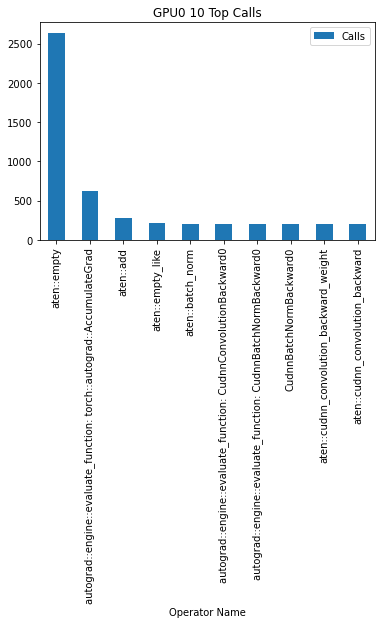

In [6]:
display_memory_table('resnet18_train_float_memory_stats.json', top=True, n_top=10)

#### Top 10 by Allocation Size

The allocation size including all children operators. It sums up all allocation bytes without considering the memory free.



 CPU 10 Top Allocation Size (KB)


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
2,aten::empty,2638,0.39,0.39,40,40,0.39,0.39
0,MeanBackward1,10,0.00,0.00,10,0,0.08,0.00
1,aten::div,10,0.00,0.00,10,10,0.08,0.08
3,aten::zeros,20,0.08,0.00,20,0,0.08,0.00
4,autograd::engine::evaluate_function: MeanBackw...,10,0.00,0.00,10,0,0.08,0.00




 GPU0 10 Top Allocation Size (KB)


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
27,aten::empty,2638,6980185.0,6980185.0,1890,1890,6980185.0,6980185.0
47,autograd::engine::evaluate_function: CudnnConv...,200,-86830.0,-1468960.0,790,0,5848355.0,0.0
2,CudnnConvolutionBackward0,200,1092050.0,0.0,710,0,5558275.0,0.0
23,aten::cudnn_convolution_backward,200,1092050.0,0.0,710,0,5558275.0,0.0
25,aten::cudnn_convolution_backward_weight,200,457010.0,-3442100.0,390,0,3899110.0,0.0
24,aten::cudnn_convolution_backward_input,190,635040.0,-389085.0,320,190,1659165.0,635040.0
22,aten::cudnn_convolution,200,781920.0,278090.0,370,200,1285750.0,781920.0
18,aten::convolution,200,781920.0,0.0,370,0,1285750.0,0.0
17,aten::conv2d,200,781920.0,0.0,370,0,1285750.0,0.0
9,aten::_convolution,200,781920.0,0.0,370,0,1285750.0,0.0


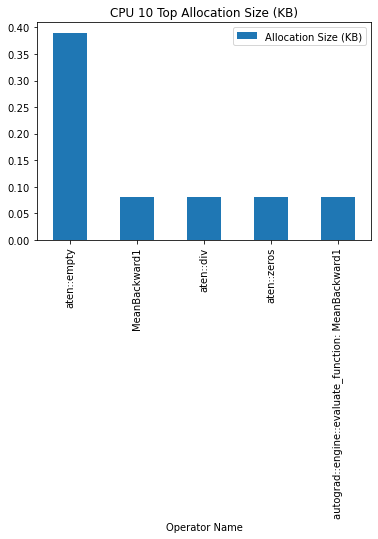

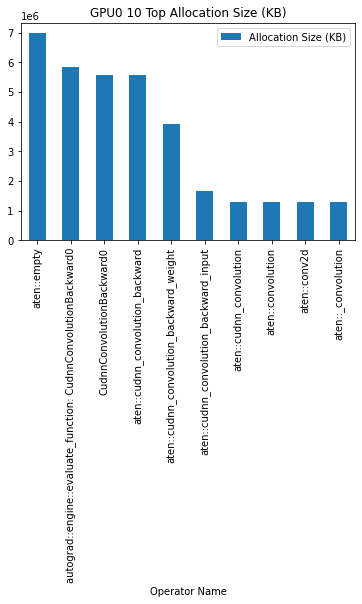

In [18]:
display_memory_table('resnet18_train_float_memory_stats.json', top=True, order_by=6, n_top=10)

#### Top 10 by Size Increase

The memory increase size includes all children operators. It sums up all allocation bytes and minus all the memory release bytes.



 CPU 10 Top Size Increase (KB)


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
2,aten::empty,2638,0.39,0.39,40,40,0.39,0.39
3,aten::zeros,20,0.08,0.00,20,0,0.08,0.00
0,MeanBackward1,10,0.00,0.00,10,0,0.08,0.00
1,aten::div,10,0.00,0.00,10,10,0.08,0.08
4,autograd::engine::evaluate_function: MeanBackw...,10,0.00,0.00,10,0,0.08,0.00




 GPU0 10 Top Size Increase (KB)


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
27,aten::empty,2638,6980185.0,6980185.0,1890,1890,6980185.0,6980185.0
2,CudnnConvolutionBackward0,200,1092050.0,0.0,710,0,5558275.0,0.0
23,aten::cudnn_convolution_backward,200,1092050.0,0.0,710,0,5558275.0,0.0
22,aten::cudnn_convolution,200,781920.0,278090.0,370,200,1285750.0,781920.0
18,aten::convolution,200,781920.0,0.0,370,0,1285750.0,0.0
9,aten::_convolution,200,781920.0,0.0,370,0,1285750.0,0.0
17,aten::conv2d,200,781920.0,0.0,370,0,1285750.0,0.0
1,CudnnBatchNormBackward0,200,776560.0,0.0,600,0,776560.0,0.0
21,aten::cudnn_batch_norm_backward,200,776560.0,0.0,600,0,776560.0,0.0
20,aten::cudnn_batch_norm,200,776560.0,0.0,600,0,776560.0,0.0


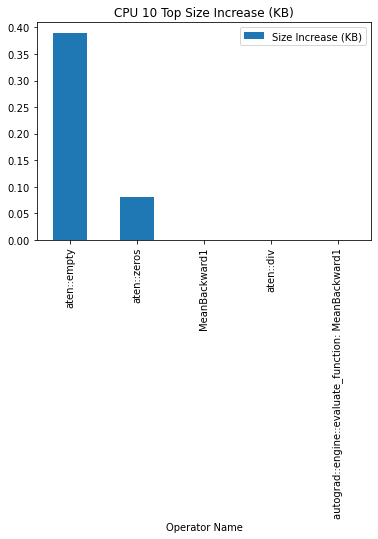

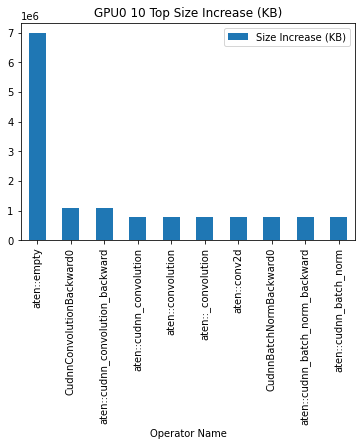

In [19]:
display_memory_table('resnet18_train_float_memory_stats.json', top=True, order_by=2, n_top=10)

## Memory Events

In [8]:
display_memory_table('resnet18_train_float_memory_events.json')


 CPU


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
0,ProfilerStep#5 (aten::empty),0.020,0.38,0.40,0.02
1,aten::zeros (aten::empty),0.004,0.21,0.41,0.21
2,enumerate(DataLoader)#_MultiProcessingDataLoad...,0.020,0.50,0.51,0.01
3,aten::zeros (aten::empty),0.004,0.44,0.52,0.08
4,<unknown>,0.008,9.72,9.79,0.07
...,...,...,...,...,...
256,aten::div,0.008,504.46,504.52,0.07
257,<unknown>,4704.000,471.29,NaN,NaN
258,<unknown>,4704.000,NaN,4.33,NaN
259,<unknown>,4704.000,NaN,94.83,NaN



 GPU0


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
0,aten::cudnn_convolution (aten::empty),74.0,9.60,9.66,0.06
1,aten::cudnn_convolution (aten::empty),400.5,10.68,10.75,0.07
2,aten::cudnn_convolution (aten::empty),400.5,11.73,11.79,0.07
3,aten::cudnn_convolution (aten::empty),400.5,12.89,12.95,0.05
4,aten::cudnn_convolution (aten::empty),400.5,13.70,13.74,0.05
...,...,...,...,...,...
2907,<unknown>,0.5,NaN,23.96,NaN
2908,<unknown>,0.5,NaN,24.70,NaN
2909,<unknown>,0.5,NaN,25.72,NaN
2910,<unknown>,31.5,NaN,26.84,NaN


#### Top 25 by Size (KB)



 CPU 25 Top Size (KB)


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
260,<unknown>,4704.00,NaN,311.70,NaN
209,<unknown>,4704.00,309.42,410.49,101.070
80,<unknown>,4704.00,2.87,146.58,143.710
106,<unknown>,4704.00,2.00,206.23,204.230
132,<unknown>,4704.00,1.23,258.39,257.160
183,<unknown>,4704.00,310.63,361.64,51.020
29,<unknown>,4704.00,3.70,45.10,41.400
258,<unknown>,4704.00,NaN,4.33,NaN
235,<unknown>,4704.00,409.54,473.01,63.480
259,<unknown>,4704.00,NaN,94.83,NaN




 GPU0 25 Top Size (KB)


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
648,aten::cudnn_convolution_backward_weight (aten:...,41472.0,126.91,126.99,0.09
626,aten::cudnn_convolution_backward_weight (aten:...,41472.0,124.35,124.45,0.09
1515,aten::cudnn_convolution_backward_weight (aten:...,41472.0,289.45,289.54,0.09
70,aten::cudnn_convolution_backward_weight (aten:...,41472.0,31.52,31.56,0.05
1493,aten::cudnn_convolution_backward_weight (aten:...,41472.0,287.03,287.12,0.09
1481,aten::cudnn_convolution_backward_weight (aten:...,41472.0,285.89,285.98,0.10
903,aten::cudnn_convolution_backward_weight (aten:...,41472.0,183.14,183.25,0.11
2637,aten::cudnn_convolution_backward_weight (aten:...,41472.0,505.15,505.23,0.08
2059,aten::cudnn_convolution_backward_weight (aten:...,41472.0,387.07,387.18,0.11
2649,aten::cudnn_convolution_backward_weight (aten:...,41472.0,505.97,506.03,0.06


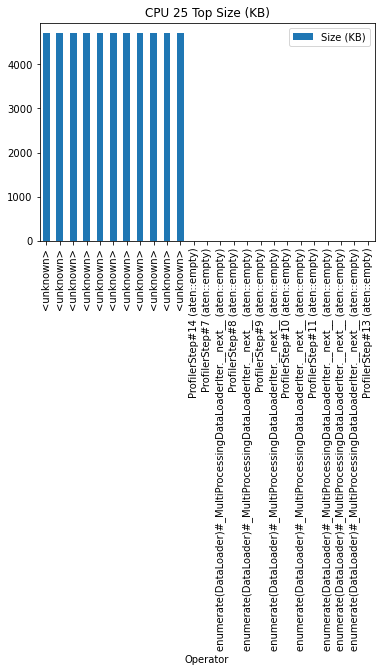

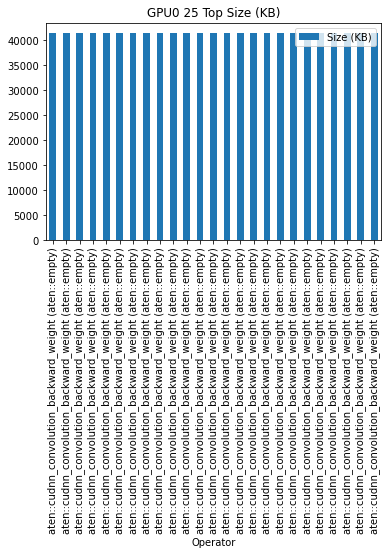

In [10]:
display_memory_table('resnet18_train_float_memory_events.json', top=True, n_top=25)

#### Top 25 by Duration (ms)



 CPU 25 Top Duration (ms)


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
132,<unknown>,4704.000,1.23,258.39,257.16
106,<unknown>,4704.000,2.00,206.23,204.23
80,<unknown>,4704.000,2.87,146.58,143.71
209,<unknown>,4704.000,309.42,410.49,101.07
235,<unknown>,4704.000,409.54,473.01,63.48
183,<unknown>,4704.000,310.63,361.64,51.02
29,<unknown>,4704.000,3.70,45.10,41.40
1,aten::zeros (aten::empty),0.004,0.21,0.41,0.21
26,aten::zeros (aten::empty),0.004,43.45,43.64,0.19
77,aten::zeros (aten::empty),0.004,144.91,145.10,0.19




 GPU0 25 Top Duration (ms)


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
2620,aten::nll_loss_forward,0.5,432.88,503.26,70.38
2619,aten::addmm,31.5,432.64,503.01,70.37
2618,aten::add,0.5,431.94,502.25,70.31
2616,aten::add,0.5,431.32,501.56,70.23
2613,aten::add,0.5,430.59,500.78,70.20
2612,aten::add,0.5,429.98,499.93,69.95
2610,aten::add,0.5,429.21,498.94,69.73
2608,aten::add,0.5,428.37,497.95,69.58
2606,aten::add,0.5,427.63,497.00,69.36
2603,aten::add,0.5,426.82,495.98,69.16


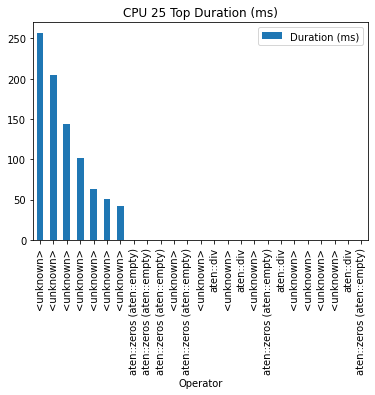

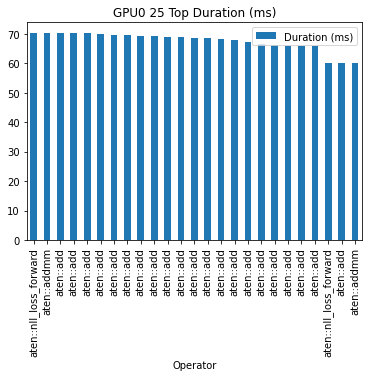

In [20]:
display_memory_table('resnet18_train_float_memory_events.json', top=True, order_by=4, n_top=25)

## Resnet152

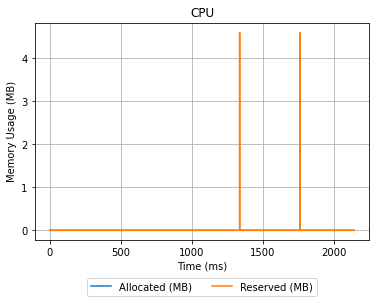

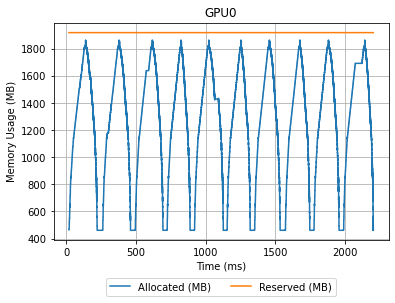

In [11]:
plot_memory_curve('/Users/bryanmonca/Files/LMU/Capstone/json_files/resnet152/train/float/resnet152_train_float_memory_curve.json')

### Memory Stats

In [13]:
display_memory_table('/Users/bryanmonca/Files/LMU/Capstone/json_files/resnet152/train/float/resnet152_train_float_memory_stats.json')


 CPU


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
0,MeanBackward1,10,0.00,0.00,10,0,0.08,0.00
1,aten::div,10,0.00,0.00,10,10,0.08,0.08
2,aten::empty,20183,0.39,0.39,40,40,0.39,0.39
3,aten::zeros,20,0.08,0.00,20,0,0.08,0.00
4,autograd::engine::evaluate_function: MeanBackw...,10,0.00,0.00,10,0,0.08,0.00



 GPU0


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
0,AddmmBackward0,10,80640.0,0.0,20,0,80640.0,0.0
1,CudnnBatchNormBackward0,1550,7067230.0,0.0,4650,0,7067230.0,0.0
2,CudnnConvolutionBackward0,1550,9146450.0,0.0,5300,0,21326845.0,0.0
3,LogSoftmaxBackward0,10,315.0,0.0,10,0,315.0,0.0
4,MaxPool2DWithIndicesBackward0,10,250880.0,0.0,10,0,250880.0,0.0
5,MeanBackward1,10,31360.0,0.0,10,0,31360.0,0.0
6,NllLossBackward0,10,315.0,0.0,10,0,315.0,0.0
7,ReluBackward0,1510,6599520.0,0.0,1510,0,6599520.0,0.0
8,aten::_batch_norm_impl_index,1550,7082270.0,0.0,4650,0,7082270.0,0.0
9,aten::_convolution,1550,7057120.0,0.0,3030,0,9641690.0,0.0


#### Top 10 by Calls



 CPU 10 Top Calls


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
2,aten::empty,20183,0.39,0.39,40,40,0.39,0.39
3,aten::zeros,20,0.08,0.00,20,0,0.08,0.00
0,MeanBackward1,10,0.00,0.00,10,0,0.08,0.00
1,aten::div,10,0.00,0.00,10,10,0.08,0.08
4,autograd::engine::evaluate_function: MeanBackw...,10,0.00,0.00,10,0,0.08,0.00




 GPU0 10 Top Calls


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
27,aten::empty,20183,31191955.0,31191955.0,14540,14540,31191955.0,31191955.0
53,autograd::engine::evaluate_function: torch::au...,4670,-2363480.0,-2363480.0,0,0,0.0,0.0
14,aten::add,2050,4140295.0,4140295.0,2050,2050,4140295.0,4140295.0
28,aten::empty_like,1560,7076325.0,0.0,1560,0,7076325.0,0.0
16,aten::batch_norm,1550,7082270.0,0.0,4650,0,7082270.0,0.0
47,autograd::engine::evaluate_function: CudnnConv...,1550,-2164110.0,-15450080.0,5800,0,25466365.0,0.0
46,autograd::engine::evaluate_function: CudnnBatc...,1550,-2957600.0,-10024830.0,4650,0,7067230.0,0.0
1,CudnnBatchNormBackward0,1550,7067230.0,0.0,4650,0,7067230.0,0.0
25,aten::cudnn_convolution_backward_weight,1550,2277490.0,-9294980.0,2350,0,11572470.0,0.0
23,aten::cudnn_convolution_backward,1550,9146450.0,0.0,5300,0,21326845.0,0.0


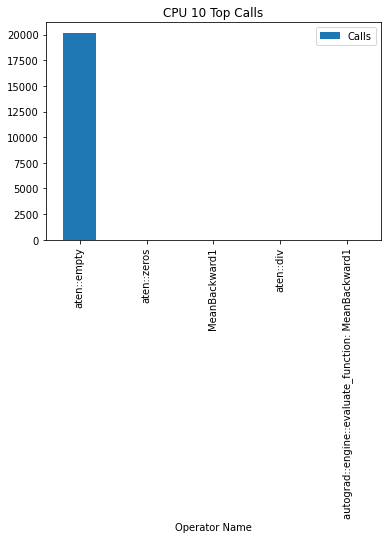

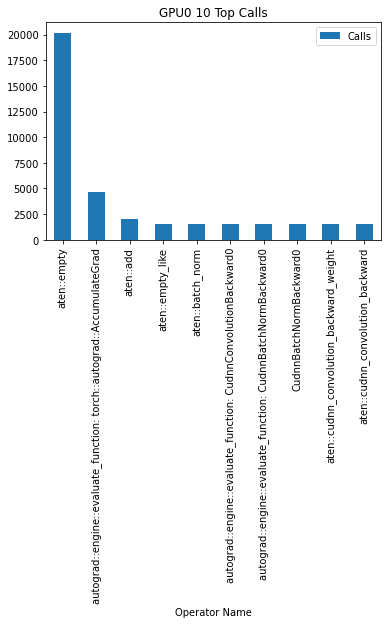

In [14]:
display_memory_table('/Users/bryanmonca/Files/LMU/Capstone/json_files/resnet152/train/float/resnet152_train_float_memory_stats.json', top=True)


#### Top 10 by Allocation Size



 CPU 10 Top Allocation Size (KB)


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
2,aten::empty,20183,0.39,0.39,40,40,0.39,0.39
0,MeanBackward1,10,0.00,0.00,10,0,0.08,0.00
1,aten::div,10,0.00,0.00,10,10,0.08,0.08
3,aten::zeros,20,0.08,0.00,20,0,0.08,0.00
4,autograd::engine::evaluate_function: MeanBackw...,10,0.00,0.00,10,0,0.08,0.00




 GPU0 10 Top Allocation Size (KB)


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
27,aten::empty,20183,31191955.0,31191955.0,14540,14540,31191955.0,31191955.0
47,autograd::engine::evaluate_function: CudnnConv...,1550,-2164110.0,-15450080.0,5800,0,25466365.0,0.0
2,CudnnConvolutionBackward0,1550,9146450.0,0.0,5300,0,21326845.0,0.0
23,aten::cudnn_convolution_backward,1550,9146450.0,0.0,5300,0,21326845.0,0.0
25,aten::cudnn_convolution_backward_weight,1550,2277490.0,-9294980.0,2350,0,11572470.0,0.0
24,aten::cudnn_convolution_backward_input,1540,6868960.0,3983545.0,2950,1540,9754375.0,6868960.0
22,aten::cudnn_convolution,1550,7057120.0,4472550.0,3030,1550,9641690.0,7057120.0
9,aten::_convolution,1550,7057120.0,0.0,3030,0,9641690.0,0.0
18,aten::convolution,1550,7057120.0,0.0,3030,0,9641690.0,0.0
17,aten::conv2d,1550,7057120.0,0.0,3030,0,9641690.0,0.0


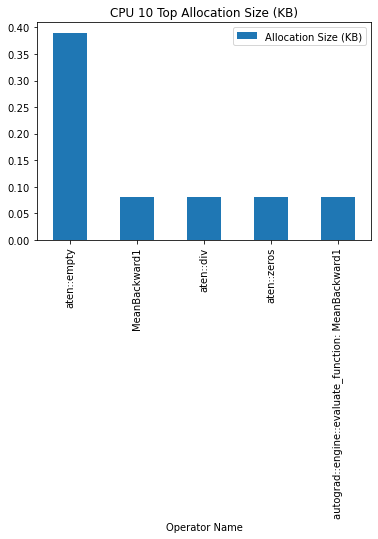

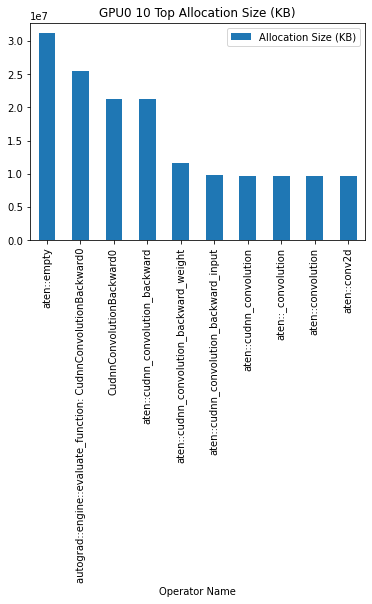

In [22]:
display_memory_table('/Users/bryanmonca/Files/LMU/Capstone/json_files/resnet152/train/float/resnet152_train_float_memory_stats.json', top=True, order_by=6, n_top=10)

#### Top 10 by Size Increase



 CPU 10 Top Size Increase (KB)


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
2,aten::empty,20183,0.39,0.39,40,40,0.39,0.39
3,aten::zeros,20,0.08,0.00,20,0,0.08,0.00
0,MeanBackward1,10,0.00,0.00,10,0,0.08,0.00
1,aten::div,10,0.00,0.00,10,10,0.08,0.08
4,autograd::engine::evaluate_function: MeanBackw...,10,0.00,0.00,10,0,0.08,0.00




 GPU0 10 Top Size Increase (KB)


,Operator Name,Calls,Size Increase (KB),Self Size Increase (KB),Allocation Count,Self Allocation Count,Allocation Size (KB),Self Allocation Size (KB)
27,aten::empty,20183,31191955.0,31191955.0,14540,14540,31191955.0,31191955.0
23,aten::cudnn_convolution_backward,1550,9146450.0,0.0,5300,0,21326845.0,0.0
2,CudnnConvolutionBackward0,1550,9146450.0,0.0,5300,0,21326845.0,0.0
20,aten::cudnn_batch_norm,1550,7082270.0,0.0,4650,0,7082270.0,0.0
16,aten::batch_norm,1550,7082270.0,0.0,4650,0,7082270.0,0.0
8,aten::_batch_norm_impl_index,1550,7082270.0,0.0,4650,0,7082270.0,0.0
28,aten::empty_like,1560,7076325.0,0.0,1560,0,7076325.0,0.0
21,aten::cudnn_batch_norm_backward,1550,7067230.0,0.0,4650,0,7067230.0,0.0
1,CudnnBatchNormBackward0,1550,7067230.0,0.0,4650,0,7067230.0,0.0
18,aten::convolution,1550,7057120.0,0.0,3030,0,9641690.0,0.0


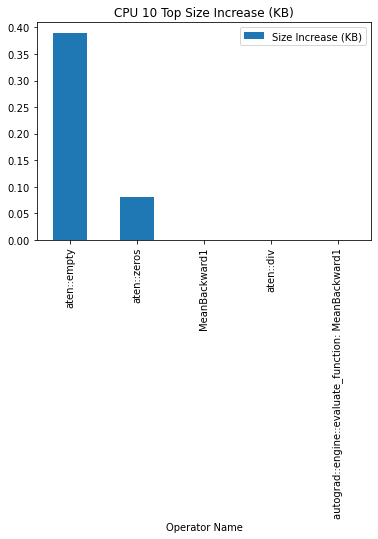

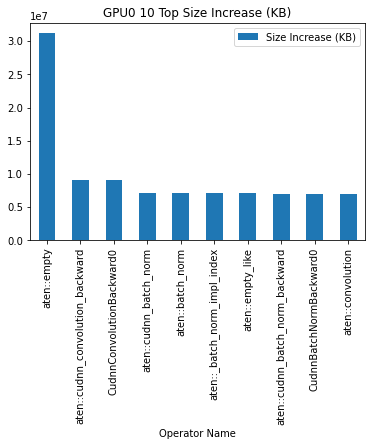

In [23]:
display_memory_table('/Users/bryanmonca/Files/LMU/Capstone/json_files/resnet152/train/float/resnet152_train_float_memory_stats.json', top=True, order_by=2, n_top=10)

## Memory Events

In [15]:
display_memory_table('/Users/bryanmonca/Files/LMU/Capstone/json_files/resnet152/train/float/resnet152_train_float_memory_events.json')


 CPU


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
0,ProfilerStep#5 (aten::empty),0.020,1.17,1.19,0.020
1,aten::zeros (aten::empty),0.004,0.21,1.20,0.980
2,enumerate(DataLoader)#_MultiProcessingDataLoad...,0.020,1.32,1.33,0.005
3,aten::zeros (aten::empty),0.004,1.25,1.33,0.080
4,<unknown>,0.008,21.64,21.73,0.090
...,...,...,...,...,...
1606,<unknown>,4704.000,NaN,706.50,NaN
1607,<unknown>,4704.000,NaN,903.24,NaN
1608,<unknown>,4704.000,NaN,1138.34,NaN
1609,<unknown>,4704.000,NaN,1335.88,NaN



 GPU0


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
0,aten::cudnn_convolution (aten::empty),74.0,21.38,21.55,0.17
1,aten::cudnn_convolution (aten::empty),400.5,23.77,23.85,0.08
2,aten::cudnn_convolution (aten::empty),18.5,24.55,24.61,0.06
3,aten::cudnn_convolution (aten::empty),18.5,25.21,25.25,0.05
4,aten::empty_like (aten::empty),25088.0,25.49,25.84,0.35
...,...,...,...,...,...
21502,<unknown>,0.5,NaN,131.68,NaN
21503,<unknown>,0.5,NaN,132.30,NaN
21504,<unknown>,0.5,NaN,132.90,NaN
21505,<unknown>,31.5,NaN,133.64,NaN


#### Top 25 by Size (KB)



 CPU 25 Top Size (KB)


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
1610,<unknown>,4704.00,NaN,1759.86,NaN
1605,<unknown>,4704.00,NaN,471.82,NaN
1124,<unknown>,4704.00,1335.22,1545.55,210.330
1445,<unknown>,4704.00,1758.93,1970.89,211.960
1603,<unknown>,4704.00,NaN,1.86,NaN
1604,<unknown>,4704.00,NaN,233.81,NaN
1602,<unknown>,4704.00,1334.45,NaN,NaN
1606,<unknown>,4704.00,NaN,706.50,NaN
1607,<unknown>,4704.00,NaN,903.24,NaN
1608,<unknown>,4704.00,NaN,1138.34,NaN




 GPU0 25 Top Size (KB)


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
215,aten::cudnn_convolution_backward_weight (aten:...,41472.0,142.81,142.94,0.12
10854,aten::cudnn_convolution_backward_weight (aten:...,41472.0,1254.20,1254.26,0.05
8755,aten::cudnn_convolution_backward_weight (aten:...,41472.0,1024.91,1024.99,0.07
19430,aten::cudnn_convolution_backward_weight (aten:...,41472.0,2143.39,2143.45,0.06
17259,aten::cudnn_convolution_backward_weight (aten:...,41472.0,1880.73,1880.84,0.10
2350,aten::cudnn_convolution_backward_weight (aten:...,41472.0,382.59,382.69,0.10
4449,aten::cudnn_convolution_backward_weight (aten:...,41472.0,617.65,617.76,0.11
4485,aten::cudnn_convolution_backward_weight (aten:...,41472.0,621.27,621.37,0.10
6584,aten::cudnn_convolution_backward_weight (aten:...,41472.0,823.80,823.86,0.06
2314,aten::cudnn_convolution_backward_weight (aten:...,41472.0,378.81,378.92,0.11


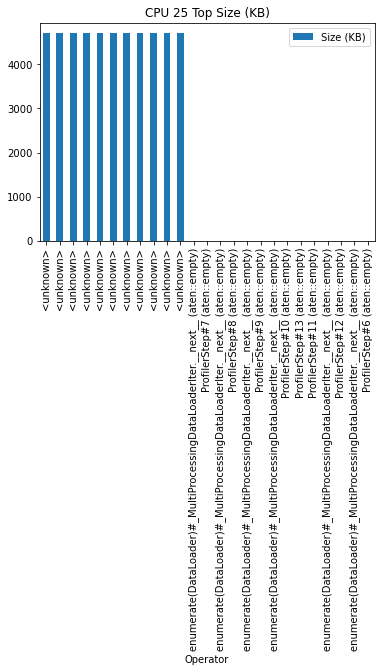

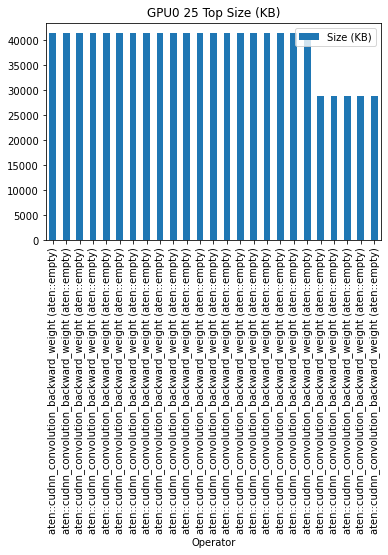

In [17]:
display_memory_table('/Users/bryanmonca/Files/LMU/Capstone/json_files/resnet152/train/float/resnet152_train_float_memory_events.json', top=True, n_top=25)

#### Top 25 by Duration (ms)



 CPU 25 Top Duration (ms)


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
1445,<unknown>,4704.000,1758.93,1970.89,211.96
1124,<unknown>,4704.000,1335.22,1545.55,210.33
104,<unknown>,0.008,93.45,95.89,2.44
1,aten::zeros (aten::empty),0.004,0.21,1.20,0.98
161,aten::zeros (aten::empty),0.004,231.81,232.26,0.46
1121,aten::zeros (aten::empty),0.004,1543.92,1544.09,0.17
159,aten::div,0.008,136.43,136.59,0.17
321,aten::zeros (aten::empty),0.004,470.48,470.64,0.16
323,aten::zeros (aten::empty),0.004,470.71,470.88,0.16
163,aten::zeros (aten::empty),0.004,232.35,232.49,0.14




 GPU0 25 Top Duration (ms)


,Operator,Size (KB),Allocation Time (ms),Release Time (ms),Duration (ms)
19366,aten::nll_loss_forward,0.5,1875.77,2137.90,262.14
19359,aten::add,0.5,1872.31,2134.14,261.83
19355,aten::add,0.5,1871.00,2132.82,261.81
19347,aten::add,0.5,1867.91,2129.72,261.81
19349,aten::add,0.5,1868.53,2130.33,261.81
19357,aten::add,0.5,1871.68,2133.49,261.81
19353,aten::add,0.5,1869.85,2131.64,261.79
19345,aten::add,0.5,1867.30,2129.09,261.79
19351,aten::add,0.5,1869.20,2130.99,261.79
19365,aten::addmm,31.5,1875.54,2137.33,261.79


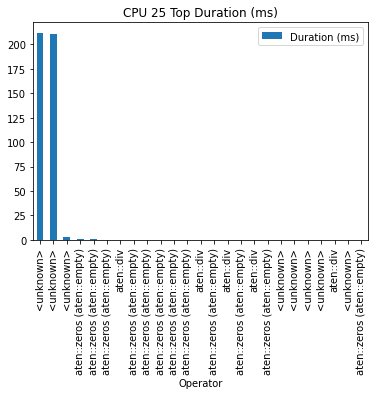

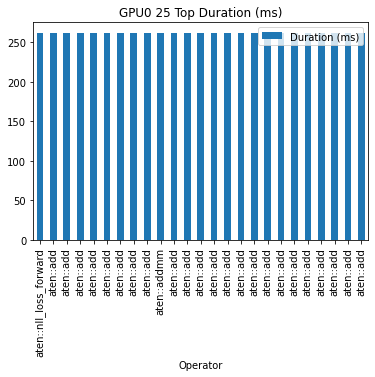

In [24]:
display_memory_table('/Users/bryanmonca/Files/LMU/Capstone/json_files/resnet152/train/float/resnet152_train_float_memory_events.json', top=True, order_by=4, n_top=25)